Importaciones:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
original = cv2.imread('img/loner.png', cv2.IMREAD_GRAYSCALE)
threshold_value = 127
_, binary_image = cv2.threshold(original, threshold_value, 255, cv2.THRESH_BINARY)

In [2]:
# Mostrar imagenes de cv2 con plt
def display(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

## Imagen original

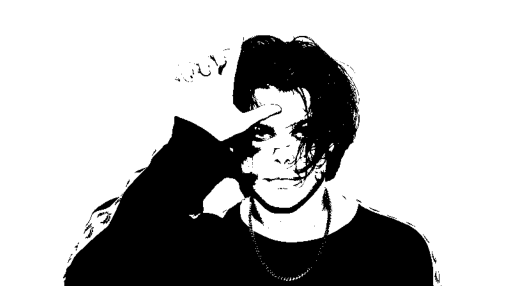

In [3]:
display(binary_image)

## Dibujar Contornos

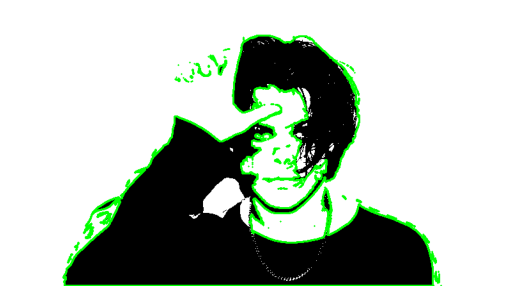

In [4]:
# 1. Invertir la imagen (opcional pero ayuda si el objeto es negro)
original_invertida = cv2.bitwise_not(binary_image)

# 2. Detectar contornos sobre la imagen invertida
contornos_encontrados, _ = cv2.findContours(original_invertida, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 3. Crear una copia en color para dibujar los contornos
contornos = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)

# 4. Dibujar los contornos
cv2.drawContours(contornos, contornos_encontrados, -1, (0, 255, 0), 2)

# 5. Mostrar
display(contornos)

## Calcular datos de los contornos

In [ ]:
# Recorrer cada contorno
for i, contorno in enumerate(contornos_encontrados):
    # Área
    area = cv2.contourArea(contorno)
    
    # Perímetro
    perimetro = cv2.arcLength(contorno, closed=True)
    
    # Momentos
    M = cv2.moments(contorno)
    
    # Centroide (verificamos que el área no sea cero para evitar división por cero)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0

    # Imprimir resultados
    print(f'Contorno {i+1}:')
    print(f'  Área: {area}')
    print(f'  Perímetro: {perimetro}')
    print(f'  Centroide: ({cx}, {cy})\n')


Contorno 1:
  Área: 0.0
  Perímetro: 0.0
  Centroide: (0, 0)

Contorno 2:
  Área: 0.0
  Perímetro: 2.0
  Centroide: (0, 0)

Contorno 3:
  Área: 25.5
  Perímetro: 71.21320307254791
  Centroide: (666, 419)

Contorno 4:
  Área: 3.5
  Perímetro: 17.899494767189026
  Centroide: (92, 390)

Contorno 5:
  Área: 0.0
  Perímetro: 2.8284270763397217
  Centroide: (0, 0)

Contorno 6:
  Área: 1.5
  Perímetro: 6.2426406145095825
  Centroide: (95, 382)

Contorno 7:
  Área: 15.5
  Perímetro: 43.21320307254791
  Centroide: (663, 389)

Contorno 8:
  Área: 0.0
  Perímetro: 2.0
  Centroide: (0, 0)

Contorno 9:
  Área: 0.5
  Perímetro: 5.414213538169861
  Centroide: (103, 374)

Contorno 10:
  Área: 7.5
  Perímetro: 13.071067690849304
  Centroide: (103, 370)

Contorno 11:
  Área: 1.0
  Perímetro: 4.828427076339722
  Centroide: (106, 365)

Contorno 12:
  Área: 5.0
  Perímetro: 29.798989295959473
  Centroide: (651, 359)

Contorno 13:
  Área: 0.0
  Perímetro: 0.0
  Centroide: (0, 0)

Contorno 14:
  Área: 0.0
  

## Visualizar datos de los contornos

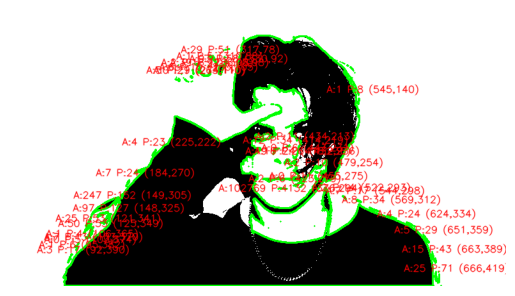

In [6]:
etiquetada = contornos.copy()

# Recorremos cada contorno
for i, contorno in enumerate(contornos_encontrados):
    # Área
    area = cv2.contourArea(contorno)

    # Perímetro
    perimetro = cv2.arcLength(contorno, closed=True)

    # Momentos para el centroide
    M = cv2.moments(contorno)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0

    # Texto a escribir
    texto = f"A:{int(area)} P:{int(perimetro)} ({cx},{cy})"

    # Dibujar el texto en la imagen
    cv2.putText(etiquetada, texto, (cx - 50, cy - 10), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (255, 0, 0), 1, cv2.LINE_AA)

# Mostrar la imagen etiquetada
display(etiquetada)


## Exportar imágenes

In [7]:
cv2.imwrite('img/binarizada.jpg', binary_image)
cv2.imwrite('img/contornos.jpg', contornos)
cv2.imwrite('img/contornosetiquetados.jpg', etiquetada)

True